# Testing the module

the testing case should be put to the unittest case

In [3]:
import xarray as xr
import numpy as np

# lazy loading of data
ds = xr.open_dataset(
    "/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_forecast/monthly/raw/r20250212/tob.nwa.full.ss_fcast.monthly.raw.r20250212.enss.i202502.nc"
)
ds = ds.drop_vars('lead')
ds = ds.rename({'valid_time':'lead'})
ds['lead'] = np.arange(len(ds['lead']))

ds.to_netcdf('/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_forecast/monthly/raw/r20250212/tob.nwa.full.ss_fcast.monthly.raw.r20250212.enss.i202502.test.nc')


In [2]:
import xarray as xr

# lazy loading of data
ds = xr.open_dataset(
    "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/hindcast/monthly/raw/r20230520/MLD_003.nwa.full.hcast.monthly.raw.r20230520.199301-201912.nc",
    chunks={"time":1}
)

# lazy loading of static grid info
ds_static = xr.open_dataset(
    "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/hindcast/monthly/raw/r20230520/ocean_static.nc",
    chunks={}
)
ds = xr.merge([ds,ds_static])
# loading a slice to memory
da_load = ds["MLD_003"].isel(time=1).load()


In [1]:
import xarray as xr
from mom6.mom6_module import mom6_read

In [3]:
# nwa_raw = mom6_read.AccessFiles(region='northeast_pacific',subdomain='full_domain',experiment_type='hindcast',output_frequency='daily',grid_type='raw',release='r20241015',data_source='local',local_top_dir='/Projects/CEFI/regional_mom6/')
nwa_regrid = mom6_read.AccessFiles(region='northeast_pacific',subdomain='full_domain',experiment_type='hindcast',output_frequency='daily',grid_type='regrid',release='r20241015',data_source='local',local_top_dir='/Projects/CEFI/regional_mom6/')

--------------------------------
Current release data is not valid. Available releases are:
r20241015
--------------------------------


FileNotFoundError: No files available based on release date

In [9]:
ds_raw.geolat

array([[10.809035, 10.846854, 10.884633, ..., 20.288687, 20.303976,
        20.319178],
       [10.87284 , 10.910718, 10.948554, ..., 20.368097, 20.383413,
        20.398642],
       [10.936667, 10.974603, 11.012498, ..., 20.447554, 20.462898,
        20.478153],
       ...,
       [51.809177, 51.90026 , 51.99134 , ..., 80.545715, 80.617134,
        80.688416],
       [51.81534 , 51.906433, 51.997524, ..., 80.56057 , 80.63205 ,
        80.7034  ],
       [51.82132 , 51.912426, 52.00353 , ..., 80.575   , 80.646545,
        80.71795 ]], dtype=float32)

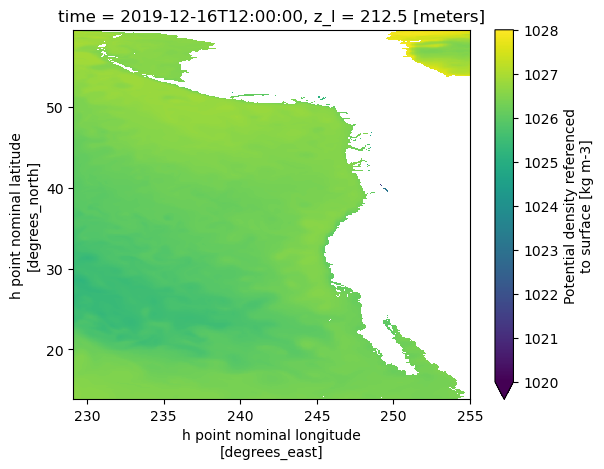

In [18]:
var_name = 'rhopot0'
ds_raw = xr.open_dataset(nwa_raw.get(var_name)[0],chunks={})
ds_static = xr.open_dataset(nwa_raw.get('ocean_static')[0],chunks={})#.drop_dims('time')
ds_raw = xr.merge([ds_raw,ds_static],combine_attrs='override')
ds_raw = ds_raw.set_coords(['geolon','geolat'])
# ds_raw[var_name].isel(time=0,z_l=0).plot(x='geolon',y='geolat')
ds_raw[var_name].isel(time=-1,z_l=-30).plot(x='xh',y='yh',vmin=1020,vmax=1028)


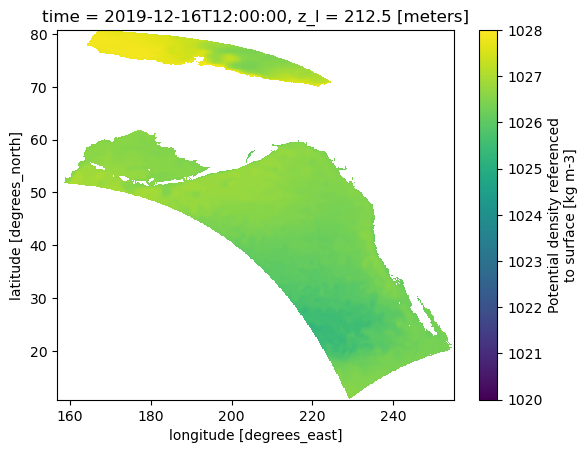

In [20]:
xr.open_dataset(nwa_regrid.get(var_name)[0],chunks={})[var_name].isel(time=-1,z_l=-30).plot(vmin=1020,vmax=1028)


In [7]:
nwa_opendap = mom6_read.AccessFiles(region='northwest_atlantic',subdomain='full_domain',experiment_type='seasonal_reforecast',output_frequency='monthly',grid_type='raw',release='r20240213',data_source='opendap')

Success: URL https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/catalog.html responded with status 200.


In [18]:
nwa_opendap.get(variable='tos')

Success: URL https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/catalog.html responded with status 200.


['https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199303.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199306.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199309.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199312.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r202

In [25]:
nwa_local = mom6_read.AccessFiles(local_top_dir='/Projects/CEFI/regional_mom6/',region='northwest_atlantic',subdomain='full_domain',experiment_type='hindcast',output_frequency='monthly',grid_type='raw',release='r20230520',data_source='local')

In [26]:
nwa_local.get(variable='ice_monthly')

['/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/hindcast/monthly/raw/r20230520/ice_monthly.static.nc']

In [21]:
nwa_opendap.get(variable='ocean_static')

Success: URL https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/catalog.html responded with status 200.


['https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/ocean_static.nc']

In [9]:
nwa_opendap.get(variable='tos')

Success: URL https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/catalog.html responded with status 200.


['https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199303.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199306.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199309.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r20240213/tos.nwa.full.ss_refcast.monthly.raw.r20240213.enss.i199312.nc',
 'https://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northwest_atlantic/full_domain/seasonal_reforecast/monthly/raw/r202

In [ ]:
opendap=mom6_read.OpenDapStore('northeast_pacific','full_domain','hindcast','monthly','raw','r20241015')

Success: URL https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/catalog.html responded with status 200.


In [3]:
opendap=mom6_read.OpenDapStore('northeast_pacific','full_domain','hindcast','monthly','raw','r20231015')

--------------------------------
Current release data is not valid. Available releases are:
r20241015
--------------------------------


FileNotFoundError: No files available based on release date

In [27]:
import warnings
import xarray as xr
from dask.distributed import Client
from mom6.mom6_module.mom6_read import AccessFiles
from mom6.mom6_module.mom6_vector_rotate import VectorRotation

warnings.simplefilter("ignore")

if __name__=="__main__":

    client = Client(processes=False,memory_limit='150GB',silence_logs=50)
    print(client)
    print(client.cluster.dashboard_link)

    local_top_dir='/Projects/CEFI/regional_mom6/'
    region='northwest_atlantic'
    subdomain='full_domain'
    experiment_type='hindcast'
    output_frequency='monthly'
    grid_type='raw'
    release='r20240213'
    data_source='local'

    u_name = 'uo'
    v_name = 'vo'

    local_access = AccessFiles(
        local_top_dir=local_top_dir,
        region=region,
        subdomain=subdomain,
        experiment_type=experiment_type,
        output_frequency=output_frequency,
        grid_type=grid_type,
        release=release,
        data_source=data_source
    )

    ufile_list = local_access.get(variable=u_name)
    vfile_list = local_access.get(variable=v_name)
    statics = local_access.get(variable='ocean_static')
    rotations = local_access.get(variable='ice_monthly')

    ds_u = xr.open_mfdataset(
        ufile_list,
        combine='by_coords',
        parallel=True
    )

    ds_v = xr.open_mfdataset(
        vfile_list,
        combine='by_coords',
        parallel=True
    )

    ds_static = xr.open_dataset(statics[0])
    ds_rotate = xr.open_dataset(rotations[0])

    # setup the rotation class
    ClassRotate = VectorRotation(ds_u,u_name,ds_v,v_name,ds_rotate)

    # perform lazy rotate
    dict_uv = ClassRotate.generate_true_uv()

    ds_u_true = xr.Dataset()
    ds_v_true = xr.Dataset()
    ds_u_true[f'{u_name}'] = dict_uv['u']
    ds_v_true[f'{v_name}'] = dict_uv['v']

<Client: 'inproc://10.173.16.4/1572986/1' processes=1 threads=96, memory=139.70 GiB>
http://10.173.16.4:8787/status
--------------------------------
Current release data is not valid. Available releases are:
r20230520
--------------------------------


FileNotFoundError: No files available based on release date

In [4]:
nep_local=mom6_read.LocalStore('/Projects/CEFI/regional_mom6/','northeast_pacific','full_domain','hindcast','monthly','raw','r20241015')

In [5]:
nep_local.get_files()

['/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/MLD_003.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',
 '/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/chl.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',
 '/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/chlos.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',
 '/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/dissic.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',
 '/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/dissicos.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',
 '/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/raw/r20241015/htotal.nep.full.hcast.monthly.raw.r20241015.199301-201912.nc',

In [4]:
nwa_local=mom6_read.LocalStore('/Projects/CEFI/regional_mom6/','northwest_atlantic','full_domain','hindcast','monthly','raw','r20230520')

In [5]:
nwa_local=mom6_read.LocalStore('/Projects/CEFI/regional_mom6/','northwest_atlantic','full_domain','hindcast','monthly','raw','r20240520')

--------------------------------
Current release data is not valid. Available releases are:
r20230520
--------------------------------


FileNotFoundError: No files available based on release date

In [11]:
nwa_opendap=mom6_read.OpenDapStore('northwest_atlantic','full_domain','hindcast','monthly','raw','r20241015')

In [ ]:
from mom6.mom6_module import mom6_read
mom6_read.SeasonalForecast(region='northwest_atlantic',domain='full_domain',experiment='seasonal_forecast',frequency='monthly',product='raw',release='r20241015')

## TEST OPENDAP

In [2]:
import pytest
opendap_raw = mom6_io.OpenDapStore('raw','historical')
test_url = opendap_raw.get_catalog()[0]
try:
    ds = xr.open_dataset(test_url)
except OSError :
    pytest.fail(f'OSError is raised OPeNDAP url not working')


In [3]:
opendap_regrid = mom6_io.OpenDapStore('regrid','historical')
testlink = opendap_regrid.get_catalog()[0]
try:
    ds = xr.open_dataset(test_url)
except OSError :
    pytest.fail(f'OSError is raised OPeNDAP url not working')

## TEST FORECAST IO

In [4]:
forecast_subdir = 'hindcast'
historical_subdir = 'hist_run'
static_subdir = 'static'
mask_subdir = 'masks'
tercile_subdir = 'tercile_calculation'

In [5]:
fcast_raw_local = mom6_io.MOM6Forecast(
    var='tob',
    data_relative_dir=forecast_subdir,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)

fcast_regrid_local = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir+'/regrid/',
    static_relative_dir=static_subdir,
    grid='regrid',
    source='local'
)

try:
    ds = fcast_raw_local.get_single(
        iyear=2006,
        imonth=6)
    if ds['init.year'] != 2006 or ds['init.month'] != 6  :
        pytest.fail(f'Picked time not the same as output time')
    ds = fcast_regrid_local.get_single(
        iyear=2012,
        imonth=9)
    if ds['init.year'] != 2012 or ds['init.month'] != 9  :
        pytest.fail(f'Picked time not the same as output time')
    ds = fcast_raw_local.get_all()
    ds = fcast_regrid_local.get_all()
except OSError :
    pytest.fail(f'OSError is raised with correct function input')




In [6]:
fcast_regrid_local_nostaticdir = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir,
    static_relative_dir=None,
    grid='raw',
    source='local'
)
with pytest.raises(OSError):
    ds = fcast_regrid_local_nostaticdir.get_single()
with pytest.raises(OSError):
    ds = fcast_regrid_local_nostaticdir.get_single()


In [7]:
fcast_regrid_local_errorloc = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir,
    static_relative_dir=static_subdir,
    grid='regrid',
    source='local'
)

with pytest.raises(OSError):
    ds = fcast_regrid_local_errorloc.get_single()
    fcast_regrid_local_errorloc.get_all()

In [8]:

fcast_regrid_local_errorgrid = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir+'/regrid/',
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)
with pytest.raises(OSError):
    fcast_regrid_local_errorgrid.get_single()
    fcast_regrid_local_errorgrid.get_all()


In [9]:
fcast_regrid_local_erroryear = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)
with pytest.raises(IndexError):
    fcast_regrid_local_erroryear.get_single(iyear=2024,imonth=12)
    fcast_regrid_local_erroryear.get_single(iyear=2024,imonth=8)

try:
    ds = fcast_regrid_local_erroryear.get_single(iyear=1993,imonth=3)
    if ds['init.year'] != 1993 or ds['init.month'] != 3  :
        pytest.fail(f'Picked time not the same as output time')
    ds = fcast_regrid_local_erroryear.get_single(iyear=2022,imonth=12)
    if ds['init.year'] != 2022 or ds['init.month'] != 12  :
        pytest.fail(f'Picked time not the same as output time')
except OSError :
    pytest.fail(f'OSError is raised with correct function input')

In [10]:
fcast_regrid_local_nodatadir = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=None,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)

with pytest.raises(OSError):
    fcast_regrid_local_nodatadir.get_single()


In [11]:

fcast_all3_raw_local = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir,
    static_relative_dir=static_subdir,
    tercile_relative_dir=tercile_subdir,
    grid='raw',
    source='local'
)

fcast_all3_regrid_local = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir=forecast_subdir+'/regrid/',
    static_relative_dir=None,
    tercile_relative_dir=tercile_subdir+'/regrid',
    grid='regrid',
    source='local'
)

try:
    ds = fcast_all3_raw_local.get_single(
        iyear=2006,
        imonth=6)
    if ds['init.year'] != 2006 or ds['init.month'] != 6  :
        pytest.fail(f'Picked time not the same as output time')
    ds = fcast_all3_regrid_local.get_single(
        iyear=2012,
        imonth=9)
    if ds['init.year'] != 2012 or ds['init.month'] != 9  :
        pytest.fail(f'Picked time not the same as output time')
except OSError :
    pytest.fail(f'OSError is raised with correct function input')

try:
    ds = fcast_all3_raw_local.get_all()
    ds = fcast_all3_regrid_local.get_all()
except OSError :
    pytest.fail(f'OSError raised in get_all with correct function input')

try:
    ds = fcast_all3_raw_local.get_tercile()
    ds = fcast_all3_regrid_local.get_tercile()
    ds = fcast_all3_raw_local.get_tercile(average_type='region')
    ds = fcast_all3_regrid_local.get_tercile(average_type='region')
except OSError :
    pytest.fail(f'OSError raised in get_tercile with correct function input')



## TEST HISTORICAL RUN IO

In [2]:
location = 'opendap'

In [5]:


histrun_raw_local = mom6_io.MOM6Historical(
    var='tob',
    data_relative_dir=historical_subdir,
    static_relative_dir=static_subdir,
    grid='raw',
    source=location
)

histrun_regrid_local = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir+'/regrid/',
    static_relative_dir=static_subdir,
    grid='regrid',
    source=location
)

try:
    ds = histrun_raw_local.get_single(
        year=2006,
        month=6)
    if ds['time.year'] != 2006 or ds['time.month'] != 6  :
        pytest.fail(f'Picked time not the same as output time')
    ds = histrun_regrid_local.get_single(
        year=2012,
        month=9)
    if ds['time.year'] != 2012 or ds['time.month'] != 9  :
        pytest.fail(f'Picked time not the same as output time')
    ds = histrun_raw_local.get_all()
    ds = histrun_regrid_local.get_all()
except OSError :
    pytest.fail(f'OSError is raised with correct function input')




In [7]:
import pytest

In [9]:
ds = histrun_regrid_local_nostaticdir.get_single()

In [10]:
ds

<xarray.Dataset> Size: 68MB
Dimensions:       (xh: 775, xq: 776, yh: 845, yq: 846, nv: 2)
Coordinates:
    time          datetime64[ns] 8B 1993-01-16T12:00:00
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
  * nv            (nv) float64 16B 1.0 2.0
Data variables: (12/30)
    Coriolis      (yq, xq) float32 3MB ...
    areacello     (yh, xh) float32 3MB ...
    areacello_bu  (yq, xq) float32 3MB ...
    areacello_cu  (yh, xq) float32 3MB ...
    areacello_cv  (yq, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    ...            ...
    wet_v         (yq, xh) float32 3MB ...
    average_DT    timedelta64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T1    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    average_T2    datetime64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
    time_bnds     (nv) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
    tos           (yh, xh) float32 3MB dask.array<chunksize=(845, 775), meta=np.ndarray>
Attributes:
    _NCProperties:                   version=2,netcdf=4.9.0,hdf5=1.12.2
    NumFilesInSet:                   1
    title:                           NWA12_MOM6_v1.0
    grid_type:                       regular
    grid_tile:                       N/A
    history:                         Fri May 12 10:50:21 2023: ncks -4 -L 3 o...
    NCO:                             netCDF Operators version 5.0.1 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [12]:
histrun_regrid_local_nostaticdir = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir,
    static_relative_dir=None,
    grid='raw',
    source=location
)

if location == 'local':
    with pytest.raises(OSError):
        ds = histrun_regrid_local_nostaticdir.get_single()
    with pytest.raises(OSError):
        ds = histrun_regrid_local_nostaticdir.get_single()


In [14]:
histrun_regrid_local_errorloc = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir,
    static_relative_dir=static_subdir,
    grid='regrid',
    source='local'
)

with pytest.raises(OSError):
    ds = histrun_regrid_local_errorloc.get_single()
    histrun_regrid_local_errorloc.get_all()

In [15]:

histrun_regrid_local_errorgrid = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir+'/regrid/',
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)
with pytest.raises(OSError):
    histrun_regrid_local_errorgrid.get_single()
    histrun_regrid_local_errorgrid.get_all()


In [16]:
histrun_regrid_local_erroryear = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)
with pytest.raises(IndexError):
    histrun_regrid_local_erroryear.get_single(year=2024,month=12)
    histrun_regrid_local_erroryear.get_single(year=2024,month=8)

try:
    ds = histrun_regrid_local_erroryear.get_single(year=1993,month=1)
    if ds['time.year'] != 1993 or ds['time.month'] != 1  :
        pytest.fail(f'Picked time not the same as output time')
    ds = histrun_regrid_local_erroryear.get_single(year=2019,month=12)
    if ds['time.year'] != 2019 or ds['time.month'] != 12  :
        pytest.fail(f'Picked time not the same as output time')
except OSError :
    pytest.fail(f'OSError is raised with correct function input')

In [17]:
histrun_regrid_local_nodatadir = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=None,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)

with pytest.raises(OSError):
    histrun_regrid_local_nodatadir.get_single()


In [20]:

histrun_all3_raw_local = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir,
    static_relative_dir=static_subdir,
    grid='raw',
    source='local'
)

histrun_all3_regrid_local = mom6_io.MOM6Historical(
    var='tos',
    data_relative_dir=historical_subdir+'/regrid/',
    static_relative_dir=None,
    grid='regrid',
    source='local'
)

try:
    ds = histrun_all3_raw_local.get_single(
        year=2006,
        month=6)
    if ds['time.year'] != 2006 or ds['time.month'] != 6  :
        pytest.fail(f'Picked time not the same as output time')
    ds = histrun_all3_regrid_local.get_single(
        year=2012,
        month=9)
    if ds['time.year'] != 2012 or ds['time.month'] != 9  :
        pytest.fail(f'Picked time not the same as output time')
except OSError :
    pytest.fail(f'OSError is raised with correct function input')

try:
    ds = histrun_all3_raw_local.get_all()
    ds = histrun_all3_regrid_local.get_all()
except OSError :
    pytest.fail(f'OSError raised in get_all with correct function input')



In [1]:
import xarray as xr
ds_obs = xr.open_dataset('/Projects/CEFI/regional_mom6/cefi_derivative/northwest_atlantic/full_domain/hindcast/yearly/raw/r20230520/indexes/obs_coldpool_index.nc')
ds_model = xr.open_dataset('/Projects/CEFI/regional_mom6/cefi_derivative/northwest_atlantic/full_domain/hindcast/yearly/raw/r20230520/indexes/model_coldpool_index.nc')

In [4]:
ds_obs = ds_obs.rename({'coldpool_index':'GLORYS'})

In [16]:
ds_obs = ds_obs.rename({'year':'time'})

In [18]:
import pandas as pd
ds_obs['time'] = pd.to_datetime(ds_obs['time'].data, format='%Y')

In [5]:
ds_model = ds_model.rename({'coldpool_index':'Model'})

In [20]:
ds_model['time'] = pd.to_datetime(ds_model['time'].data, format='%Y')

In [21]:
ds = xr.merge([ds_obs,ds_model])

In [26]:
ds.attrs['cefi_varname'] = 'cpi'
ds.to_netcdf('/Projects/CEFI/regional_mom6/cefi_derivative/northwest_atlantic/full_domain/hindcast/yearly/raw/r20230520/indexes/cold_pool_index.nc')

In [41]:
varname = 'nechannel_wsw'
ds = xr.open_dataset(f'/Projects/CEFI/regional_mom6/cefi_derivative/northwest_atlantic/full_domain/hindcast/yearly/raw/r20230520/indexes/{varname}.nc')


In [42]:
ds = ds.rename({'year':'time'})

In [43]:
ds['time'] = pd.to_datetime(ds['time'].data, format='%Y')

In [44]:
ds.attrs['cefi_varname'] = f'{varname}'
ds.to_netcdf(f'/Projects/CEFI/regional_mom6/cefi_derivative/northwest_atlantic/full_domain/hindcast/yearly/raw/r20230520/indexes/{varname}_alt.nc')

In [45]:
ds

<xarray.Dataset> Size: 1kB
Dimensions:  (time: 44)
Coordinates:
  * time     (time) datetime64[ns] 352B 1977-01-01 1978-01-01 ... 2020-01-01
Data variables:
    Model    (time) float64 352B ...
    CTDs     (time) float64 352B ...
    Mooring  (time) float32 176B ...
    GLORYS   (time) float32 176B ...
Attributes:
    cefi_varname:  nechannel_wsw